In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [ ]:
ap = argparse.ArgumentParser()
ap.add_argument("-o", "--output", required=True,
help="path to the output loss/accuracy plot")
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -o OUTPUT
ipykernel_launcher.py: error: the following arguments are required: -o/--output


SystemExit: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

[INFO] accessing MNIST...
11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

In [ ]:
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [ ]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [ ]:
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100
469/469 [==============================] - 9s 5ms/step - loss: 2.2697 - accuracy: 0.1949 - val_loss: 2.2357 - val_accuracy: 0.1870
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 2.2019 - accuracy: 0.3945 - val_loss: 2.1602 - val_accuracy: 0.6176
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 2.1131 - accuracy: 0.5476 - val_loss: 2.0517 - val_accuracy: 0.5597
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 1.9846 - accuracy: 0.6136 - val_loss: 1.8952 - val_accuracy: 0.6525
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 1.8049 - accuracy: 0.6562 - val_loss: 1.6896 - val_accuracy: 0.6924
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 1.5875 - accuracy: 0.6945 - val_loss: 1.4623 - val_accuracy: 0.7245
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 1.3701 - accuracy: 0.7301 - val_loss: 1.

In [ ]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1),
target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.92      0.94      0.93       982
           5       0.90      0.86      0.88       892
           6       0.94      0.94      0.94       958
           7       0.93      0.93      0.93      1028
           8       0.90      0.89      0.89       974
           9       0.91      0.90      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



NameError: ignored

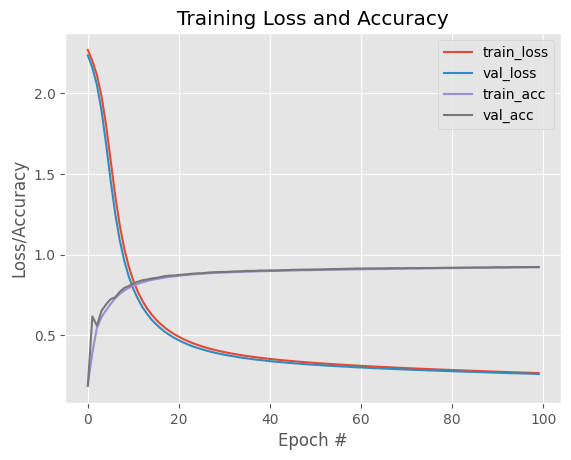

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(args["output"])